<a href="https://colab.research.google.com/github/Anushreebasics/project-3--Sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
import re # for regular expressions
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk # for text manipulation
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [244]:
train  = pd.read_csv('/content/train.csv', encoding='latin-1')
test = pd.read_csv('/content/test.csv', encoding='latin-1')

#Test PreProcessing and Cleaning

lets check some positive tweets

In [245]:
test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [246]:
train[train['sentiment']=="positive"].head(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
6,6e0c6d75b1,2am feedings for the baby are fun when he is all smiles and coos,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe... (is that possible!?),Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109
11,16fab9f95b,I really really like the song Love Story by Taylor Swift,like,positive,night,70-100,Bahamas,393244,10010.0,39
21,e48b0b8a23,Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job. Can`t wait to have a dragon pet,interesting.,positive,morning,46-60,Bosnia and Herzegovina,3280819,51000.0,64
25,e00c6ef376,"the free fillin` app on my ipod is fun, im addicted","the free fillin` app on my ipod is fun, im addicted",positive,noon,21-30,Bulgaria,6948445,108560.0,64
28,6ce4a4954b,juss came backk from Berkeleyy ; omg its madd fun out there havent been out there in a minute . whassqoodd ?,fun,positive,noon,60-70,Côte d'Ivoire,26378274,318000.0,83
30,d33f811375,I`m going home now. Have you seen my new twitter design? Quite....heavenly isn`****?,Quite....heavenly,positive,morning,0-20,Cambodia,16718965,176520.0,95
31,7d8c4c11e4,i hope unni will make the audition . fighting dahye unni !,hope,positive,noon,21-30,Cameroon,26545863,472710.0,56
33,2dc51711bc,That`s very funny. Cute kids.,funny.,positive,morning,46-60,Central African Republic,4829767,622980.0,8
39,2863f435bd,"A little happy for the wine jeje ok it`sm my free time so who cares, jaja i love this day",A little happy fo,positive,morning,46-60,Congo (Congo-Brazzaville),5518087,342000.0,16


lets check some negative tweets

In [247]:
train[train['sentiment']=='negative'].head(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,DANGERously,negative,morning,0-20,Bahrain,1701575,760.0,2239
13,04dd1d2e34,i want to go to music tonight but i lost my voice.,lost,negative,noon,21-30,Bangladesh,164689383,130170.0,1265
15,8a939bfb59,"Uh oh, I am sunburned","Uh oh, I am sunburned",negative,morning,46-60,Belarus,9449323,202910.0,47
16,3440297f8b,"S`ok, trying to plot alternatives as we speak *sigh*",*sigh*,negative,noon,60-70,Belgium,11589623,30280.0,383
17,919fa93391,"i`ve been sick for the past few days and thus, my hair looks wierd. if i didnt have a hat on it would look... http://tinyurl.com/mnf4kw",sick,negative,night,70-100,Belize,397628,22810.0,17
18,af3fed7fc3,is back home now gonna miss every one,onna,negative,morning,0-20,Benin,12123200,112760.0,108


In [248]:
train.shape, test.shape

((27481, 10), (4815, 9))

In [249]:
train['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

lets check the distribution of length of the tweets, in terms of words, in both train and test data

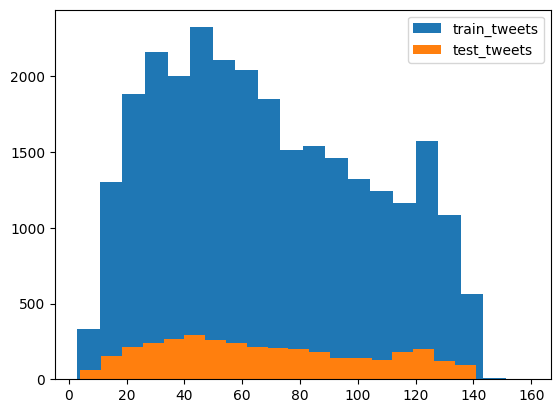

In [250]:
length_train = train['text'].str.len()
length_test = test['text'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

# Data Cleaning

In [251]:
combi = train.append(test, ignore_index=True)
combi.shape

<ipython-input-251-ca6ba94314c9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test, ignore_index=True)


(32296, 10)

Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [252]:
def remove_pattern(input_text, pattern):
    import re
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

In [253]:
combi['text'] = combi['text'].astype(str)

**1. Removing Twitter Handles (@user)**

In [254]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'], "@[\w]*")
combi.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),tidy_tweet
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,"I`d have responded, if I were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0,Sooo SAD I will miss you here in San Diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0,"Sons of ****, why couldn`t they put them on the releases we already bought"


2. Removing Punctuations, Numbers, and Special Characters

In [255]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

<ipython-input-255-acd2d472f377>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),tidy_tweet
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,I d have responded if I were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0,Sooo SAD I will miss you here in San Diego
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0,Sons of why couldn t they put them on the releases we already bought
5,28b57f3990,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth,neutral,night,70-100,Antigua and Barbuda,97929.0,440.0,223.0,http www dothebouncy com smf some shameless plugging for the best Rangers forum on earth
6,6e0c6d75b1,2am feedings for the baby are fun when he is all smiles and coos,fun,positive,morning,0-20,Argentina,45195774.0,2736690.0,17.0,am feedings for the baby are fun when he is all smiles and coos
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243.0,28470.0,104.0,Soooo high
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884.0,7682300.0,3.0,Both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe... (is that possible!?),Wow... u just became cooler.,positive,morning,46-60,Austria,9006398.0,82400.0,109.0,Journey Wow u just became cooler hehe is that possible


3. Removing Short Words

In [256]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [257]:
selected_columns = ['textID', 'sentiment','text', 'tidy_tweet']
combi = combi[selected_columns]
combi.head()

,textID,sentiment,text,tidy_tweet
0,cb774db0d1,neutral,"I`d have responded, if I were going",have responded were going
1,549e992a42,negative,Sooo SAD I will miss you here in San Diego!!!,Sooo will miss here Diego
2,088c60f138,negative,my boss is bullying me...,boss bullying
3,9642c003ef,negative,what interview! leave me alone,what interview leave alone
4,358bd9e861,negative,"Sons of ****, why couldn`t they put them on the releases we already bought",Sons couldn they them releases already bought


**4. Text Normalization**

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [258]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [259]:
tokenized_tweet.head()

0                           [have, responded, were, going]
1                          [Sooo, will, miss, here, Diego]
2                                         [boss, bullying]
3                          [what, interview, leave, alone]
4    [Sons, couldn, they, them, releases, already, bought]
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized tweets.

In [260]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

Now let’s stitch these tokens back together.

In [261]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

## Story Generation and Visualization from Tweets

A) Understanding the common words used in the tweets: WordCloud

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

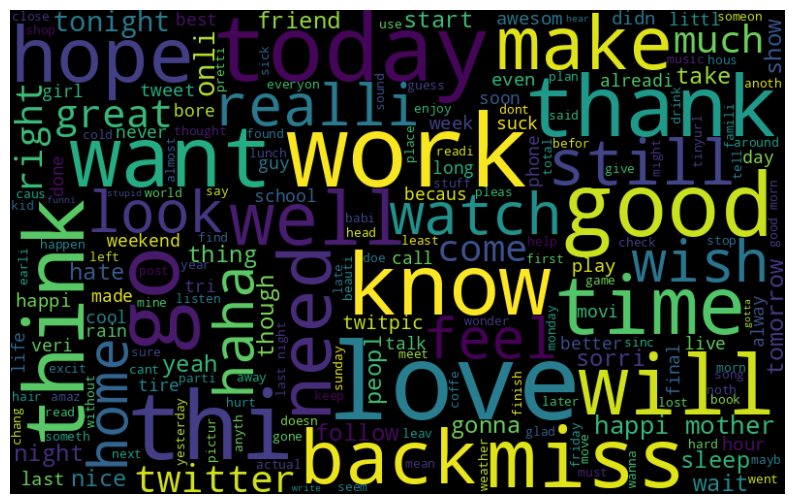

In [262]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

**B) Words in non racist/sexist tweets**

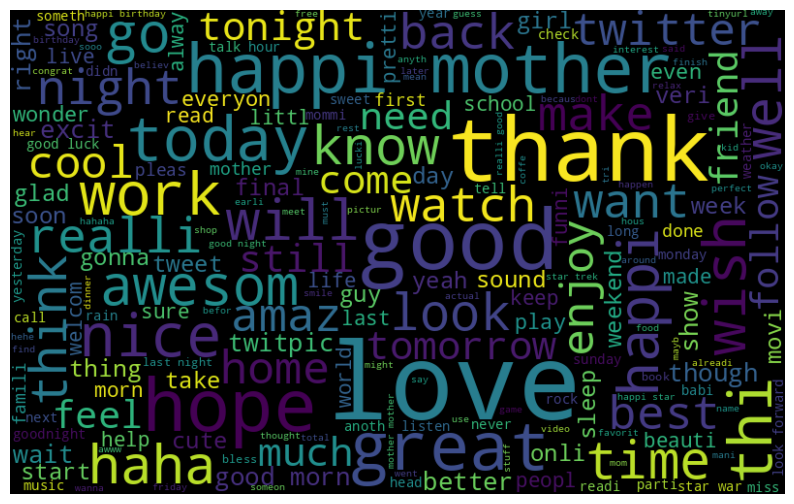

In [263]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 'positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

**C) Racist/Sexist Tweets**

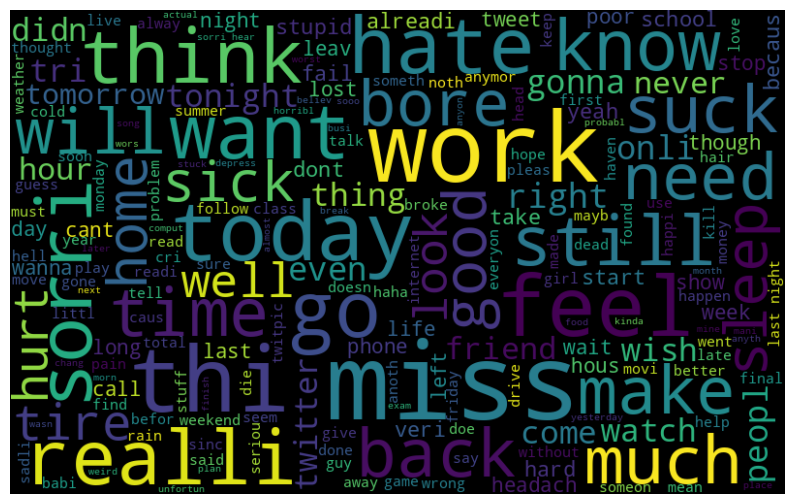

In [264]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 'negative']])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

**D) Understanding the impact of Hashtags on tweets sentiment**

In [265]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [266]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 'positive'])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 'negative'])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top 'n' hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

**Non-Racist/Sexist Tweets**

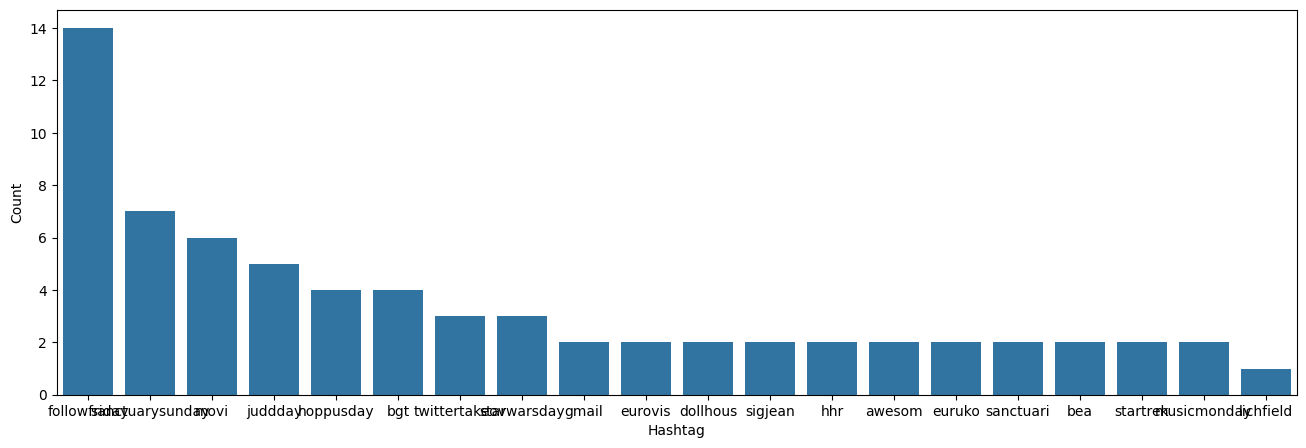

In [267]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

**Racist/Sexist Tweets**

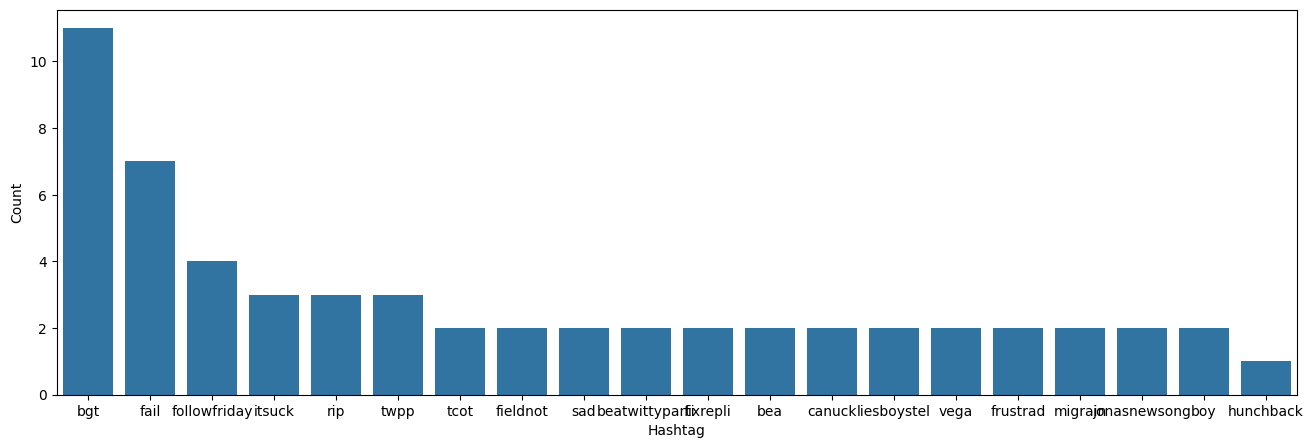

In [268]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

#Extracting Features from Cleaned Tweets

In [269]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

**Bag-of-Words Features**

In [270]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(32296, 1000)

**TF-IDF Features**

In [271]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(32296, 1000)

## Word Embeddings

**1. Word2Vec Embeddings**

In [272]:
from gensim.models import Word2Vec
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())  # tokenizing

model_w2v = Word2Vec(
    vector_size=200,  # desired no. of features/independent variables
    window=5,  # context window size
    min_count=2,
    sg=1,  # 1 for skip-gram model
    hs=0,
    negative=10,  # for negative sampling
    workers=2,  # no. of cores
    seed=34
)

model_w2v.build_vocab(tokenized_tweet, progress_per=1000)
model_w2v.train(tokenized_tweet, total_examples=model_w2v.corpus_count, epochs=20)


(3504978, 4249440)

Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [273]:
model_w2v.wv.most_similar(positive="dinner")

[('wohoo', 0.5694556832313538),
 ('yummi', 0.5669573545455933),
 ('whatnot', 0.5663998126983643),
 ('pork', 0.5532373785972595),
 ('rainforest', 0.5445296764373779),
 ('cocktail', 0.535834014415741),
 ('margarita', 0.5347850918769836),
 ('pasta', 0.533614993095398),
 ('champagn', 0.5325502753257751),
 ('housem', 0.5303401350975037)]

In [274]:
model_w2v.wv.most_similar(positive="trump")

[('jenkin', 0.8256890177726746),
 ('omlett', 0.8186376690864563),
 ('orthodontist', 0.8175979256629944),
 ('cystic', 0.8160965442657471),
 ('booooooo', 0.814810037612915),
 ('foxi', 0.8147395253181458),
 ('whee', 0.8090802431106567),
 ('workplac', 0.8088047504425049),
 ('chillaxin', 0.8061448931694031),
 ('knott', 0.8055066466331482)]

In [275]:
model_w2v.wv['food']

array([-3.07920445e-02, -1.87013596e-02,  3.90733033e-01,  5.18877879e-02,
       -4.03779238e-01, -5.08199155e-01, -2.70167977e-01, -3.96783352e-02,
       -8.83747041e-02,  1.40737072e-01,  2.46093534e-02, -3.65603119e-01,
       -3.32075983e-01, -1.12189107e-01,  7.90766999e-02,  2.03381225e-01,
        5.23093224e-01, -8.89453106e-03,  3.64569575e-01,  1.03032462e-01,
       -8.60335026e-03,  1.26196845e-02, -2.79459357e-01,  1.28725633e-01,
       -2.00409368e-01, -3.08155954e-01, -2.99532972e-02,  2.41406739e-01,
        1.88748494e-01, -2.14287192e-01,  1.97999924e-01,  2.90949017e-01,
       -2.08131358e-01, -2.88300276e-01, -3.04219872e-01,  2.18764961e-01,
        2.05721259e-01, -1.25929028e-01,  1.19550496e-01, -3.49309087e-01,
        1.67363778e-01, -1.10844687e-01, -2.70503938e-01, -5.39836735e-02,
        1.64544269e-01, -7.90563077e-02, -1.60717010e-01, -5.92430055e-01,
       -4.04242277e-01,  3.26243728e-01, -2.73277879e-01, -4.38649714e-01,
        2.71759719e-01,  

In [276]:
len(model_w2v.wv['food']) #The length of the vector is 200

200

**Preparing Vectors for Tweets**

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [277]:
def word_vector(tokens, size, model_w2v):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

Preparing word2vec feature set...

In [278]:

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())  # tokenizing

wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], 200, model_w2v)

wordvec_df = pd.DataFrame(wordvec_arrays)
print(wordvec_df.shape)


(32296, 200)


Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

**2. Doc2Vec Embedding**
To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s TaggedDocument() function.

In [279]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [280]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

In [281]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

Let's have a look at the result.

In [282]:
labeled_tweets[:6]

[TaggedDocument(words=['have', 'respond', 'were', 'go'], tags=['tweet_0']),
 TaggedDocument(words=['sooo', 'will', 'miss', 'here', 'diego'], tags=['tweet_1']),
 TaggedDocument(words=['boss', 'bulli'], tags=['tweet_2']),
 TaggedDocument(words=['what', 'interview', 'leav', 'alon'], tags=['tweet_3']),
 TaggedDocument(words=['son', 'couldn', 'they', 'them', 'releas', 'alreadi', 'bought'], tags=['tweet_4']),
 TaggedDocument(words=['http', 'dothebounci', 'some', 'shameless', 'plug', 'best', 'ranger', 'forum', 'earth'], tags=['tweet_5'])]

Now let's train a __doc2vec__ model.

In [283]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|██████████| 32296/32296 [00:00<00:00, 1845669.78it/s]


In [284]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

Preparing doc2vec Feature Set

In [285]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))

docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(32296, 200)

#Model Building

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

1. Logistic Regression
2. Support Vector Machine
3. RandomForest
4. XGBoost

**1. Logistic Regression**

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Bag-of-Words Features

In [287]:
train_bow = bow[:27481,:]
test_bow = bow[27481:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment'],
                                                          random_state=42,
                                                          test_size=0.3)

In [288]:
ytrain = ytrain.map({'positive': 1, 'negative': 0,'neutral':1})
yvalid = yvalid.map({'positive': 1, 'negative': 0,'neutral':1})

In [289]:
# Replace infinite values with NaN
ytrain.replace([np.inf, -np.inf], np.nan, inplace=True)
yvalid.replace([np.inf, -np.inf], np.nan, inplace=True)

ytrain.fillna(value=0,inplace=True)  # Replace NaN with 0
yvalid.fillna(value=0,inplace=True)


In [290]:
ytrain = ytrain.astype(int)
yvalid=yvalid.astype(int)

In [291]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.8723194665454269

Now let's make predictions for the test dataset and create a submission file.

In [292]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['sentiment'] = test_pred_int
submission = test[['textID','sentiment']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

**TF-IDF Features**

In [293]:
train_tfidf = tfidf[:27481,:]
test_tfidf = tfidf[27481:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [294]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.8660038581391898

Word2Vec Features

In [295]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [296]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.856236630522977

Doc2Vec Features

In [297]:
train_d2v = docvec_df.iloc[:27481,:]
test_d2v = docvec_df.iloc[27481:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [298]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8471346914846842

**2. Support Vector Machine**

In [299]:
from sklearn import svm

Bag-of-Words Features

In [300]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.8794697903822442

Again let's make predictions for the test dataset and create another submission file.

In [301]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['sentiment'] = test_pred_int
submission = test[['textID','sentiment']]
submission.to_csv('sub_svc_bow.csv', index=False)

TF-IDF Features

In [302]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.8739788199697428

Word2Vec Features

In [303]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.856806301995141

Doc2Vec Features

In [304]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.8467771370173006

**3. RandomForest**

In [305]:
from sklearn.ensemble import RandomForestClassifier

Bag-of-Words Features

In [306]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.8625608046829911

Let's make predictions for the test dataset and create another submission file.

In [308]:
test_pred = rf.predict(test_bow)
test['sentiment'] = test_pred
submission = test[['textID','sentiment']]
submission.to_csv('sub_rf_bow.csv', index=False)

TF-IDF Features

In [309]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.8747891735603567

Word2Vec Features

In [310]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.8583544115459009

Doc2Vec Features

In [311]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.8511168070303918

##Model Finetuning

In [312]:
import xgboost as xgb

Here we will use DMatrices. A DMatrix can contain both the features and the target.

In [313]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

In [314]:
# Parameters that we are going to tune
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}

We will prepare a custom evaluation metric to calculate F1 score.

In [315]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

General Approach for Parameter Tuning

We will follow the steps below to tune the parameters.

Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.
Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.
Tune the learning rate.
Finally tune gamma to avoid overfitting.
Tuning max_depth and min_child_weight

In [316]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
    for min_child_weight in range(5,8)
]

In [317]:
max_f1 = 0. # initializing with 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))


CV with max_depth=6, min_child_weight=5


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.8432484 for 1 rounds
CV with max_depth=6, min_child_weight=6


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.8431214 for 1 rounds
CV with max_depth=6, min_child_weight=7


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.8431502 for 1 rounds
CV with max_depth=7, min_child_weight=5


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.8421758 for 2 rounds
CV with max_depth=7, min_child_weight=6


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.8419844 for 15 rounds
CV with max_depth=7, min_child_weight=7


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.8429376 for 1 rounds
CV with max_depth=8, min_child_weight=5


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.8403195999999999 for 2 rounds
CV with max_depth=8, min_child_weight=6


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.8401825999999998 for 0 rounds
CV with max_depth=8, min_child_weight=7


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.8398986 for 0 rounds
CV with max_depth=9, min_child_weight=5


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.838687 for 0 rounds
CV with max_depth=9, min_child_weight=6


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.8457958000000001 for 29 rounds
CV with max_depth=9, min_child_weight=7


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.8396478 for 0 rounds
Best params: 9, 6, F1 Score: 0.8457958000000001


Updating max_depth and min_child_weight parameters.

In [318]:
params['max_depth'] = 8
params['min_child_weight'] = 6

Tuning subsample and colsample.

In [319]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)]
]

In [320]:
max_f1 = 0.
best_params = None
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))

    # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample

    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))


CV with subsample=0.5, colsample=0.5


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8369540000000001 for 0 rounds
CV with subsample=0.5, colsample=0.6


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8369540000000001 for 0 rounds
CV with subsample=0.5, colsample=0.7


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8369540000000001 for 0 rounds
CV with subsample=0.5, colsample=0.8


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:48:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8369540000000001 for 0 rounds
CV with subsample=0.5, colsample=0.9


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:49:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:49:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:49:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8369540000000001 for 0 rounds
CV with subsample=0.6, colsample=0.5


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:49:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:49:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:49:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8354659999999999 for 0 rounds
CV with subsample=0.6, colsample=0.6


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:49:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:49:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:49:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8354659999999999 for 0 rounds
CV with subsample=0.6, colsample=0.7


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:50:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:50:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:50:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8354659999999999 for 0 rounds
CV with subsample=0.6, colsample=0.8


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:50:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:50:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:50:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8354659999999999 for 0 rounds
CV with subsample=0.6, colsample=0.9


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:50:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:50:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:50:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8354659999999999 for 0 rounds
CV with subsample=0.7, colsample=0.5


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8393832 for 0 rounds
CV with subsample=0.7, colsample=0.6


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8393832 for 0 rounds
CV with subsample=0.7, colsample=0.7


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8393832 for 0 rounds
CV with subsample=0.7, colsample=0.8


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:51:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8393832 for 0 rounds
CV with subsample=0.7, colsample=0.9


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:52:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:52:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:52:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8393832 for 0 rounds
CV with subsample=0.8, colsample=0.5


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:52:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:52:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:52:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8393442 for 1 rounds
CV with subsample=0.8, colsample=0.6


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:52:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:52:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:52:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8393442 for 1 rounds
CV with subsample=0.8, colsample=0.7


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:52:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:52:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:52:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8393442 for 1 rounds
CV with subsample=0.8, colsample=0.8


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8393442 for 1 rounds
CV with subsample=0.8, colsample=0.9


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8393442 for 1 rounds
CV with subsample=0.9, colsample=0.5


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8401156000000001 for 0 rounds
CV with subsample=0.9, colsample=0.6


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:53:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8401156000000001 for 0 rounds
CV with subsample=0.9, colsample=0.7


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:54:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:54:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:54:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8401156000000001 for 0 rounds
CV with subsample=0.9, colsample=0.8


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:54:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:54:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:54:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8401156000000001 for 0 rounds
CV with subsample=0.9, colsample=0.9


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:54:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:54:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:54:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8401156000000001 for 0 rounds
Best params: 0.9, 0.5, F1 Score: 0.8401156000000001


Updating subsample and colsample_bytree.

In [321]:
params['subsample'] = .9
params['colsample_bytree'] = .5

Now let's tune the learning rate.

In [322]:
max_f1 = 0.
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))

    # Update ETA
    params['eta'] = eta

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:54:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:54:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:54:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8450940000000001 for 85 rounds
CV with eta=0.2


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:55:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:55:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:55:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8482034 for 7 rounds
CV with eta=0.1


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:56:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:56:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:56:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


	F1 Score 0.8540150000000001 for 16 rounds
CV with eta=0.05


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:56:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:56:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:56:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8582485999999999 for 31 rounds
CV with eta=0.01


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:57:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:57:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:57:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8352015999999999 for 0 rounds
CV with eta=0.005


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:57:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:57:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:57:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8352015999999999 for 0 rounds
Best params: 0.05, F1 Score: 0.8582485999999999


In [323]:
params['eta'] = .1

Now lets tune gamma value using the parameters already tuned above. We’ll check for 5 values here.

In [324]:
max_f1 = 0.
best_params = None
for gamma in range(0,15):
    print("CV with gamma={}".format(gamma/10.))

    # Update ETA
    params['gamma'] = gamma/10.

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = gamma/10.

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with gamma=0.0


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:57:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:58:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:58:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8540150000000001 for 16 rounds
CV with gamma=0.1


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:58:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:58:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:58:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8542786 for 16 rounds
CV with gamma=0.2


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:58:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:58:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:58:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


	F1 Score 0.8544832000000001 for 18 rounds
CV with gamma=0.3


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:59:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:59:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:59:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8547984 for 14 rounds
CV with gamma=0.4


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:59:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:59:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:59:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


	F1 Score 0.8540478 for 14 rounds
CV with gamma=0.5


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:59:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:59:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:59:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8549657999999999 for 18 rounds
CV with gamma=0.6


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:00:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:00:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:00:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.854626 for 12 rounds
CV with gamma=0.7


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:00:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:00:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:00:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8546082 for 16 rounds
CV with gamma=0.8


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:01:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:01:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:01:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8550739999999999 for 18 rounds
CV with gamma=0.9


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:01:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:01:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:01:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8543078 for 17 rounds
CV with gamma=1.0


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:01:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:01:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:01:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8557707999999999 for 15 rounds
CV with gamma=1.1


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:02:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:02:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:02:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8545512000000001 for 13 rounds
CV with gamma=1.2


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:02:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:02:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:02:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


	F1 Score 0.8541462 for 17 rounds
CV with gamma=1.3


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:02:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:02:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:02:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


	F1 Score 0.8550818 for 16 rounds
CV with gamma=1.4


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:03:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:03:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:03:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: Us

	F1 Score 0.8549404 for 15 rounds
Best params: 1.0, F1 Score: 0.8557707999999999


In [325]:
params['gamma'] = 1.2

Let's have a look at the final list of parameters.

In [326]:
params

{'objective': 'binary:logistic',
 'max_depth': 8,
 'min_child_weight': 6,
 'eta': 0.1,
 'subsample': 0.9,
 'colsample_bytree': 0.5,
 'colsample': 0.9,
 'gamma': 1.2}

In [327]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
)

/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:12:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	Validation-logloss:0.58442	Validation-f1_score:0.83479
[1]	Validation-logloss:0.57372	Validation-f1_score:0.83479
[2]	Validation-logloss:0.56474	Validation-f1_score:0.83886
[3]	Validation-logloss:0.55673	Validation-f1_score:0.84258
[4]	Validation-logloss:0.54889	Validation-f1_score:0.84512
[5]	Validation-logloss:0.54129	Validation-f1_score:0.84782
[6]	Validation-logloss:0.53524	Validation-f1_score:0.84853
[7]	Validation-logloss:0.52988	Validation-f1_score:0.85144
[8]	Validation-logloss:0.52499	Validation-f1_score:0.85228
[9]	Validation-logloss:0.52038	Validation-f1_score:0.85350
[10]	Validation-logloss:0.51634	Validation-f1_score:0.85343
[11]	Validation-logloss:0.51238	Validation-f1_score:0.85441
[12]	Validation-logloss:0.50897	Validation-f1_score:0.85446
[13]	Validation-logloss:0.50561	Validation-f1_score:0.85453
[14]	Validation-logloss:0.50259	Validation-f1_score:0.85391
[15]	Validation-logloss:0.50025	Validation-f1_score:0.85478
[16]	Validation-logloss:0.49829	Validation-f1_scor